In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
%%time
id = 'XXXXXXXXXX'
!wget --save-cookies cookies.txt 'https://docs.google.com/uc?export=download&id='{id} -O- \
| sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1/p' > confirm.txt && wget --content-disposition --load-cookies cookies.txt 'https://docs.google.com/uc?export=download&id='{id}'&confirm='$(<confirm.txt)

--2020-07-04 04:07:06--  https://docs.google.com/uc?export=download&id=1NTuDGvaXJOG-2TViwG1dJkgqJrENY26z
Resolving docs.google.com (docs.google.com)... 173.194.76.113, 173.194.76.139, 173.194.76.102, ...
Connecting to docs.google.com (docs.google.com)|173.194.76.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.21K  --.-KB/s    in 0s      

2020-07-04 04:07:06 (36.0 MB/s) - written to stdout [3283]

--2020-07-04 04:07:06--  https://docs.google.com/uc?export=download&id=1NTuDGvaXJOG-2TViwG1dJkgqJrENY26z&confirm=eo3u
Resolving docs.google.com (docs.google.com)... 173.194.76.101, 173.194.76.138, 173.194.76.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.76.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-9s-docs.googleusercontent.com/docs/securesc/dc6tsjqvb2vqto2ja7hdh3ss2h0b6g65/4ork1r437l

In [3]:
%%time
!unzip /content/'shopee-product-detection-dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/train/40/23ad693e18e097185d1244374ba769cc.jpg  
  inflating: train/train/40/23bd6cca1e919689206f92388b44d325.jpg  
  inflating: train/train/40/23c7beac3cdafe529351114903c59fce.jpg  
  inflating: train/train/40/23e8212b6432efd9425f3892f4027352.jpg  
  inflating: train/train/40/23ff069da9e694541c35444ebc7f21a7.jpg  
  inflating: train/train/40/2418076cb2f41c86fa1e91b385768093.jpg  
  inflating: train/train/40/2437204a3cfe46b863373820961d0d46.jpg  
  inflating: train/train/40/24378c3a9bf723b99e05757fedb1ea87.jpg  
  inflating: train/train/40/243794ebb1e40d23766b818ab8aefb87.jpg  
  inflating: train/train/40/243b97396484342838071f927958b010.jpg  
  inflating: train/train/40/244afd9ab1567d9dfe06b5ed098c0f60.jpg  
  inflating: train/train/40/24795c07a2ff098234ee1e78a2933e8f.jpg  
  inflating: train/train/40/24ab70e3a55a56a824fe9779abf40003.jpg  
  inflating: train/train/40/24c55bc0134eed87af4dc49ea63a5971.jpg  
  inflating

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from keras.applications import Xception
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions

import os


Using TensorFlow backend.


In [5]:
train_folders = os.listdir('/content/train/train/')
train_path = '/content/train/train/'


In [6]:
filenames_list = []
categories = []
from itertools import repeat

for i in train_folders:
  fname_list = os.listdir(train_path+i)
  filenames_list.extend(fname_list)
  categories.extend(repeat(i.zfill(2),len(fname_list)))

In [7]:
df_train = pd.DataFrame({
    'filename': filenames_list,
    'category': categories
})
df_train.head()


,filename,category
0,960ba65bdfe9421d6da1d0ed9065cbce.jpg,08
1,8646a21f1d0555f23077e3605bd012d6.jpg,08
2,0f55e0ed22625bdf2809cabce05cfc14.jpg,08
3,3079ee67cc3d38285dbd6d025bf9a763.jpg,08
4,3829301694d72904e820177d31e2b74d.jpg,08


In [8]:
df_train = df_train.reset_index()


In [9]:
df_train['fname_full']=df_train['category']+'/'+df_train['filename']


In [10]:
df_train = df_train.reset_index()

image_size = 224
input_shape = (image_size, image_size, 3)

batch_size = 1

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(
    df_train, 
    train_path, 
    x_col='fname_full',
    y_col='category',
    shuffle=False,
    batch_size=batch_size,
    target_size=(image_size, image_size))


Step_size_train  = train_generator.n//train_generator.batch_size

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 6 invalid image filename(s) in x_col="fname_full". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 105392 validated image filenames belonging to 42 classes.


In [45]:
%%time
id = 'CNNmodel_Final '
!wget --save-cookies cookies.txt 'https://docs.google.com/uc?export=download&id='{id} -O- \
| sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1/p' > confirm.txt && wget --content-disposition --load-cookies cookies.txt 'https://docs.google.com/uc?export=download&id='{id}'&confirm='$(<confirm.txt)

--2020-07-04 08:37:06--  https://docs.google.com/uc?export=download&id=1A1fvd4bH7B0TEgxXzJWcs7PsN7pu-rWW
Resolving docs.google.com (docs.google.com)... 173.194.76.101, 173.194.76.139, 173.194.76.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.76.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.18K  --.-KB/s    in 0s      

2020-07-04 08:37:06 (47.3 MB/s) - written to stdout [3253]

--2020-07-04 08:37:06--  https://docs.google.com/uc?export=download&id=1A1fvd4bH7B0TEgxXzJWcs7PsN7pu-rWW&confirm=fFvx
Resolving docs.google.com (docs.google.com)... 173.194.76.139, 173.194.76.113, 173.194.76.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.76.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-0s-docs.googleusercontent.com/docs/securesc/9efiu8i52ogcaje2mm8akj0l1ne4elcn/ckevvlslua

In [112]:
from keras.models import load_model
model1 = load_model('/content/CNNmodel_Final.h5')

In [113]:
#拔掉42個prob
from keras.models import Model
layer_name = 'fc4'
model1 = Model(inputs=model1.input,
               outputs=model1.get_layer(layer_name).output)
model1.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [114]:
%%time
from tqdm import tqdm

train_data = []
train_label = []
train_generator.reset()

for i in tqdm(range(Step_size_train)):
    x,y= next(train_generator)
    tmp_x = model1.predict(x)
    train_data.append(tmp_x[0])
    train_label.append(np.argmax(y[0],axis=0))


100%|██████████| 105392/105392 [1:07:25<00:00, 26.05it/s]

CPU times: user 44min 51s, sys: 3min 27s, total: 48min 19s
Wall time: 1h 7min 25s


In [49]:
GBDT_train_base = pd.DataFrame(train_data)
#GBDT_train_base = GBDT_train_base.round(10)

In [50]:
GBDT_train_base['category']=train_label
GBDT_train_base.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,category
0,0.0,0.0,1.625582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.750018,0.0,3.538341,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.069430,0.0,0.0,0.0,0.0,0.0,0.047704,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.164532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.420522,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,6.857818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.569588,0.0,0.0,2.867168,0.0,1.491517,8
1,0.0,0.0,0.428068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.236016,0.0,27.553049,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.703871,0.0,0.0,0.0,0.0,0.0,7.661380,0.0,0.0,0.0,0.0,0.0,6.775313,...,0.0,0.0,0.0,0.0,11.070586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.494792,0.0,0.0,3.726025,0.0,0.0,0.0,0.0,38.838715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.612072,0.0,0.0,22.446247,0.0,4.005601,8
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.306306,0.0,4.418089,0.0,0.0,0.0,0.0,0.0,0.057818,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.508389,0.0,0.0,0.0,0.0,0.0,1.843822,...,0.0,0.0,0.0,0.0,1.478974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.790631,0.0,0.0,0.393737,0.0,0.0,0.0,0.0,9.446476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.707780,0.0,0.0,3.184966,0.0,0.974272,8


**XGB EDA**

In [52]:
prob_diff = []

for i in range(len(GBDT_train_base)):
  tmp=list(GBDT_train_base.iloc[i,:].sort_values(ascending=False))
  prob_diff.append(tmp[0]-tmp[1])

In [53]:
prob_diff

[1.1421818733215332,
 11.285665512084961,
 1.4464759826660156,
 6.835721015930176,
 2.9195456504821777,
 1.7159481048583984,
 0.7551331520080566,
 8.582691192626953,
 4.568510055541992,
 0.8491764068603516,
 3.795055866241455,
 3.6797285079956055,
 3.5035266876220703,
 8.379080772399902,
 11.019554138183594,
 3.6608872413635254,
 5.214696884155273,
 13.078981399536133,
 1.7583236694335938,
 8.6989107131958,
 4.362473487854004,
 1.0303959846496582,
 1.0851020812988281,
 4.630992889404297,
 1.46113920211792,
 6.9083967208862305,
 10.712888717651367,
 2.0214996337890625,
 2.4206552505493164,
 2.937345504760742,
 2.8130040168762207,
 4.900299072265625,
 11.819666862487793,
 17.551427841186523,
 2.8644962310791016,
 0.5157914161682129,
 11.90090274810791,
 5.506443977355957,
 5.098150968551636,
 2.862905502319336,
 0.6611480712890625,
 3.838359832763672,
 5.659307479858398,
 4.242457389831543,
 2.014751434326172,
 0.3077526092529297,
 4.987941741943359,
 12.190506935119629,
 3.2945775985717

(array([5.0323e+04, 2.5102e+04, 1.6189e+04, 1.1274e+04, 2.3290e+03,
        1.1700e+02, 4.6000e+01, 5.0000e+00, 6.0000e+00, 1.0000e+00]),
 array([7.31945038e-05, 9.00625560e+00, 1.80124380e+01, 2.70186204e+01,
        3.60248028e+01, 4.50309852e+01, 5.40371676e+01, 6.30433501e+01,
        7.20495325e+01, 8.10557149e+01, 9.00618973e+01]),
 <a list of 10 Patch objects>)

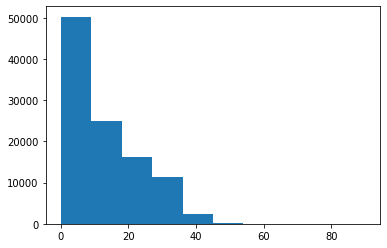

In [54]:
import matplotlib.pyplot as plt
plt.hist(prob_diff)

In [55]:
prob_diff_bool = []

for i in prob_diff:
  if i>0.2:prob_diff_bool.append(True)
  else:prob_diff_bool.append(False)

In [56]:
GBDT_train_base_1 = GBDT_train_base[prob_diff_bool]

In [57]:
print(GBDT_train_base.shape)
print(GBDT_train_base_1.shape)

(105392, 129)
(98870, 129)


In [58]:
 train_label_1 = pd.Series(train_label)
 train_label_1 = train_label_1[prob_diff_bool]

In [59]:
len(train_label_1)

98870

In [60]:
#STD
STD = GBDT_train_base_1.std(axis=1)
STD

0         1.141986
1         5.470379
2         1.294011
3         2.444949
4         1.013949
            ...   
105387    2.054979
105388    4.584959
105389    2.371828
105390    3.542344
105391    2.183158
Length: 98870, dtype: float64

In [61]:
GBDT_train_base_2 = GBDT_train_base_1[STD>0.5]
train_label_2 = train_label_1[STD>0.5]

In [62]:
print(len(GBDT_train_base_2))
print(len(train_label_2))


98556
98556


***Modeling***

In [109]:
import xgboost as xgb

# specify your configurations as a dict
params = {
    'objective': 'multi:softmax', 
    'num_class':42,

    'gamma': 3.88,
    'method':'gpu_hist',
    'silent': 0,
    'learning_rate':0.15,
    'max_depth':3,
    "lambda_l1":6,
    "lambda_l2":6,
    "subsample":0.8,
    "min_gain_to_split":0.001,
    'verbose':1,
    'min_child_weight':3
}


In [64]:
from collections import Counter
Counter(train_label_2)

Counter({0: 1827,
         1: 2192,
         2: 1799,
         3: 2129,
         4: 1759,
         5: 2414,
         6: 2526,
         7: 2055,
         8: 2542,
         9: 2558,
         10: 2619,
         11: 1771,
         12: 2496,
         13: 2367,
         14: 2615,
         15: 2517,
         16: 2514,
         17: 1471,
         18: 2066,
         19: 2608,
         20: 2607,
         21: 2508,
         22: 2571,
         23: 2482,
         24: 2640,
         25: 2621,
         26: 2618,
         27: 2649,
         28: 2518,
         29: 2138,
         30: 2693,
         31: 2656,
         32: 2130,
         33: 572,
         34: 2599,
         35: 2643,
         36: 2683,
         37: 1721,
         38: 2673,
         39: 2659,
         40: 2668,
         41: 2662})

In [65]:
dtrain = xgb.DMatrix(GBDT_train_base_2,label=train_label_2)

In [77]:
train_label_2.astype

<bound method NDFrame.astype of 0          8
1          8
2          8
3          8
4          8
          ..
105387    23
105388    23
105389    23
105390    23
105391    23
Length: 98556, dtype: int64>

In [66]:
%%time

cv_xgb= xgb.cv(params,dtrain,
               num_boost_round=1500,
               early_stopping_rounds=20,
               nfold=2, metrics='mlogloss',show_stdv=True)

print(cv_xgb)

     train-mlogloss-mean  ...  test-mlogloss-std
0               2.017880  ...           0.002288
1               1.689731  ...           0.002349
2               1.468141  ...           0.001842
3               1.293611  ...           0.000545
4               1.149768  ...           0.001757
..                   ...  ...                ...
201             0.005013  ...           0.000436
202             0.005010  ...           0.000442
203             0.005010  ...           0.000442
204             0.005010  ...           0.000442
205             0.005010  ...           0.000441

[206 rows x 4 columns]
CPU times: user 3h 5min 48s, sys: 18.4 s, total: 3h 6min 6s
Wall time: 1h 35min 46s


In [72]:
cv_xgb

,train-mlogloss-mean,train-mlogloss-std,test-mlogloss-mean,test-mlogloss-std
0,2.017880,0.005615,2.025635,0.002288
1,1.689731,0.002992,1.698258,0.002349
2,1.468141,0.002632,1.477165,0.001842
3,1.293611,0.003286,1.302792,0.000545
4,1.149768,0.001489,1.159224,0.001757
...,...,...,...,...
201,0.005013,0.000015,0.005951,0.000436
202,0.005010,0.000015,0.005947,0.000442
203,0.005010,0.000015,0.005947,0.000442
204,0.005010,0.000015,0.005947,0.000442


In [67]:
bst = xgb.train(params,dtrain,num_boost_round =cv_xgb.shape[0])

save_path = '/content/gdrive/My Drive/SCL_2/'
import pickle
file_name = save_path+'XGB_0704_round10.bin'
pickle.dump(bst,open(file_name,'wb'))

**Load Model & Predict**

In [68]:
test_path = '/content/test/test/'
test_filenames = os.listdir(test_path)


In [69]:
df_test = pd.DataFrame({
    'filename': test_filenames,
})

image_size = 224
input_shape = (image_size, image_size, 3)

batch_size = 1 #一個batch有幾張圖

test_gen = ImageDataGenerator(rescale=1./225)
test_generator = test_gen.flow_from_dataframe(
    df_test, 
    test_path, 
    x_col='filename',
    y_col=None,
    shuffle=False,
    class_mode=None,
    batch_size=batch_size,
    target_size=(image_size, image_size),
)

Found 12192 validated image filenames.


In [80]:
%%time
#CNN捲出特徵
from tqdm import tqdm

Step_size_test  = test_generator.n//test_generator.batch_size

test_data = []
test_generator.reset()

for i in tqdm(range(Step_size_test)):
    x= next(test_generator)
    tmp_x = model1.predict(x)
    test_data.append(tmp_x[0])


100%|██████████| 12192/12192 [07:27<00:00, 27.25it/s]

CPU times: user 5min 4s, sys: 20.6 s, total: 5min 25s
Wall time: 7min 27s


In [101]:
import xgboost as xgb
GBDT_test_base = pd.DataFrame(test_data)
#xgb_model_loaded.feature_names
GBDT_test_base = GBDT_test_base.round(10)

dtest = xgb.DMatrix(pd.DataFrame(GBDT_test_base))

In [102]:
#Load XGB Model
import pickle
XGB_file_name = save_path+'XGB_0704_round10.bin'

xgb_model_loaded = pickle.load(open(XGB_file_name,'rb'))

dtest = xgb.DMatrix(pd.DataFrame(test_data))
y_pred = xgb_model_loaded.predict(dtest)

In [ ]:
y_pred_sub=[]
for i in range(len(y_pred)):
    y_pred_sub.append(str(int(y_pred[i])).zfill(2))

test_df = pd.DataFrame({
    'filename': test_filenames,
    'category':y_pred_sub
})


*Submit*

In [ ]:
submission_df = pd.read_csv(save_path+'SCL2_test.csv')
submission_df = submission_df.drop('category',axis=1)

print(submission_df.shape)

In [ ]:
submission_df = submission_df.merge(test_df,on='filename',how='left')
submission_df.columns=['filename','category']
submission_df.columns

In [ ]:
submission_df.shape

In [ ]:
submission_df.groupby(['category']).count()

In [ ]:
submission_df.to_csv(save_path+'sub_df_0704_FINALCNN.csv', index=False)